# Data visualization

## Stance labels distributions

In [45]:
import ast
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO


# Read JSON file line by line and concatenate into a single DataFrame
df = pd.read_json("processed_results.json")

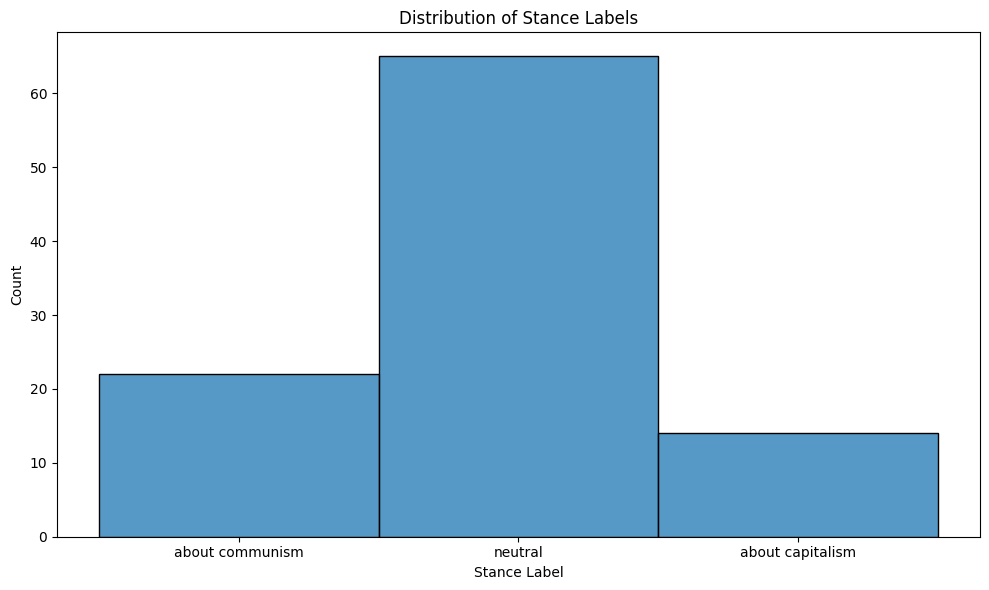

In [46]:
# Extract only the "label" from dictionary columns
df["stance_label"] = df["response_stance"].apply(lambda x: x["label"] if isinstance(x, dict) else None)

# Plot histogram to show the distribution of labels in df['stance_label']
plt.figure(figsize=(10, 6))
sns.histplot(df['stance_label'])
plt.title('Distribution of Stance Labels')
plt.xlabel('Stance Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

df.drop(columns=['stance_label'], inplace=True)

## number of times prompt is not about china but response mention it

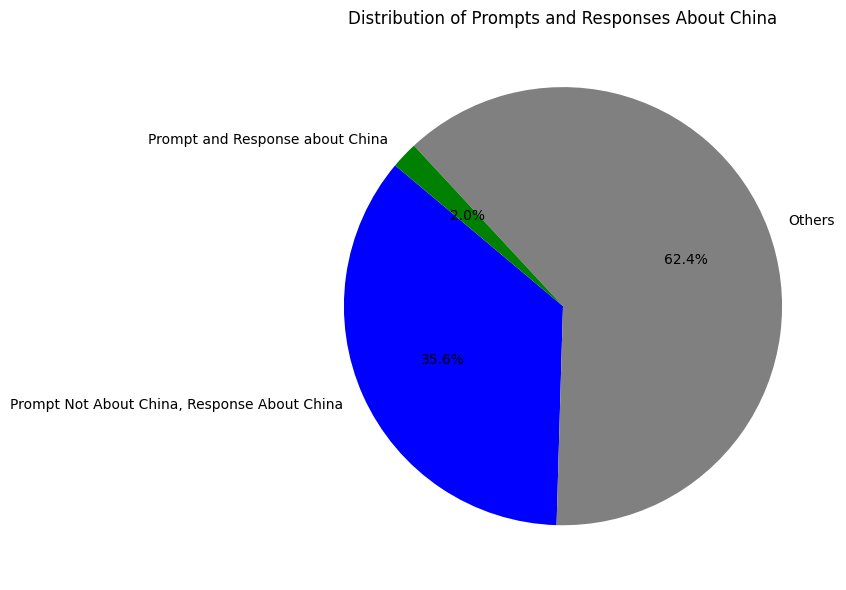

In [47]:
prompt_and_result_about_china_counts = df[(df['prompt_about_china'] == True) & (df['response_about_china'] == True)].shape[0]
prompt_not_about_china_and_result_about_china_counts = df[(df['prompt_about_china'] == False) & (df['response_about_china'] == True)].shape[0]
other = df.shape[0] - (prompt_and_result_about_china_counts + prompt_not_about_china_and_result_about_china_counts)
 
# Plot the number of times the prompt is not about China but the response is
plt.figure(figsize=(8, 6))
counts = [prompt_not_about_china_and_result_about_china_counts, other, prompt_and_result_about_china_counts]
labels = ['Prompt Not About China, Response About China', 'Others', 'Prompt and Response about China']
colors = ['blue', 'grey', 'green']
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Prompts and Responses About China')
plt.tight_layout()
plt.show()


## Stance scores distributions

In [48]:
# import json
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Caricare i dati dal file JSON
# data = df.to_dict(orient="records")

# stance_data = []
# for entry in data:
#     for key, value in entry.items():
#         if "stance" in key and isinstance(value, dict):
#             stance_data.append({
#                 "stance_type": key,
#                 "label": value["label"],
#                 "score": value["score"] if type(value["score"]) == float else 1 - abs(value["score"][0] - value["score"][1])
#             })

# # Convertire in dataframe
# data_df = pd.DataFrame(stance_data)

# # Convertire il dataframe in un formato corretto
# data_df["score"] = pd.to_numeric(data_df["score"])

# # Controllare se ci sono valori NaN dopo la conversione
# data_df = data_df.dropna(subset=["score"])  # Rimuovere eventuali valori non numerici

# # Creare i grafici a violino
# plt.figure(figsize=(12, 6))
# sns.violinplot(x="label", y="score", hue="stance_type", data=data_df)
# plt.title("Distribuzione degli score per ogni stance label")
# plt.xticks(rotation=45)
# plt.legend(title="Stance Type", bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.tight_layout()

# # Mostrare il grafico
# plt.show()



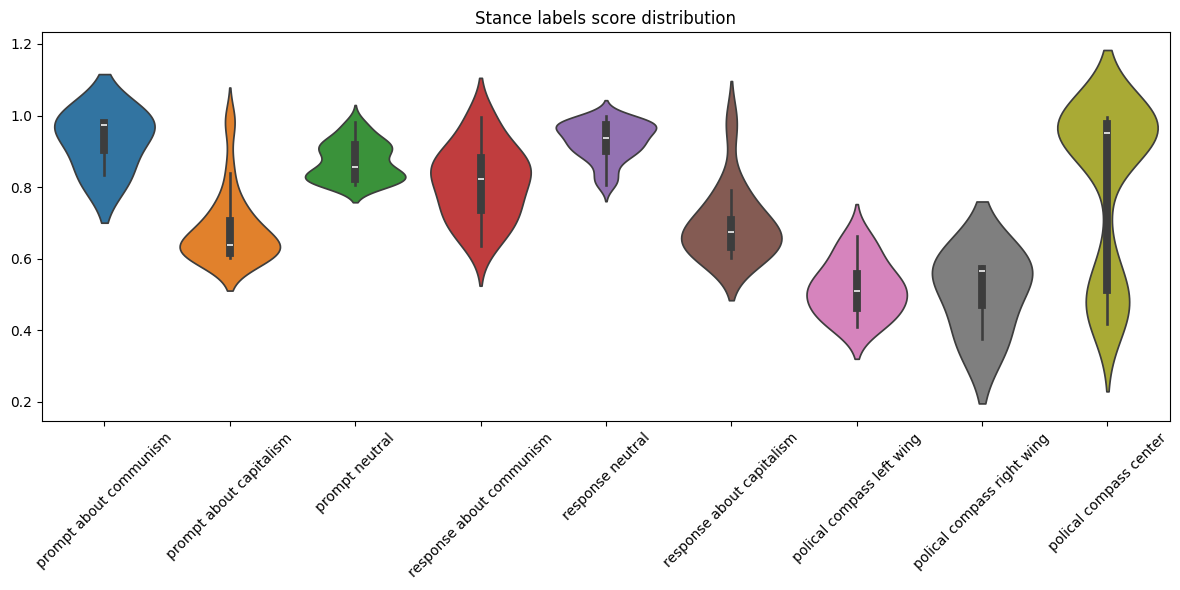

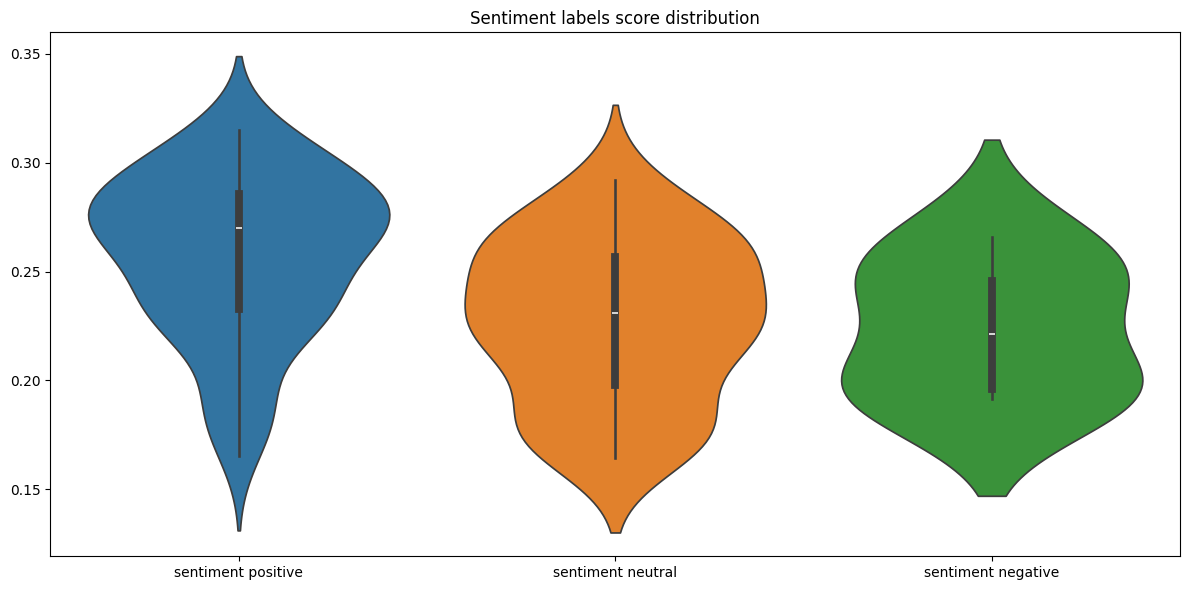

In [49]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

score_df = pd.DataFrame()
sentiment_df = pd.DataFrame()
columns = [col for col in df.columns if "stance" in col]
for col in columns:
    unique_labels = df[col].apply(lambda x: x["label"]).unique()
    for value in unique_labels:
        score_df[f"{col}_{value}".replace("_stance", "").replace("_", " ").replace("left right", "polical compass")] = df[col].apply(lambda x: x["score"] if x["label"] == value else None)

for value in df["sentiment"].apply(lambda x: x["label"]).unique():
    unique_labels = df["sentiment"].apply(lambda x: x["label"]).unique()
    for value in unique_labels:
        sentiment_df[f"sentiment_{value}".replace("_stance", "").replace("_", " ").replace("left right", "polical compass")] = df["sentiment"].apply(lambda x: x["score"] if x["label"] == value else None)

plt.figure(figsize=(12, 6))
sns.violinplot(data=score_df)
plt.title("Stance labels score distribution")
plt.xticks(rotation=45)
plt.tight_layout()

plt.figure(figsize=(12, 6))
sns.violinplot(data=sentiment_df)
plt.title("Sentiment labels score distribution")
plt.tight_layout()


## Correlation between labels

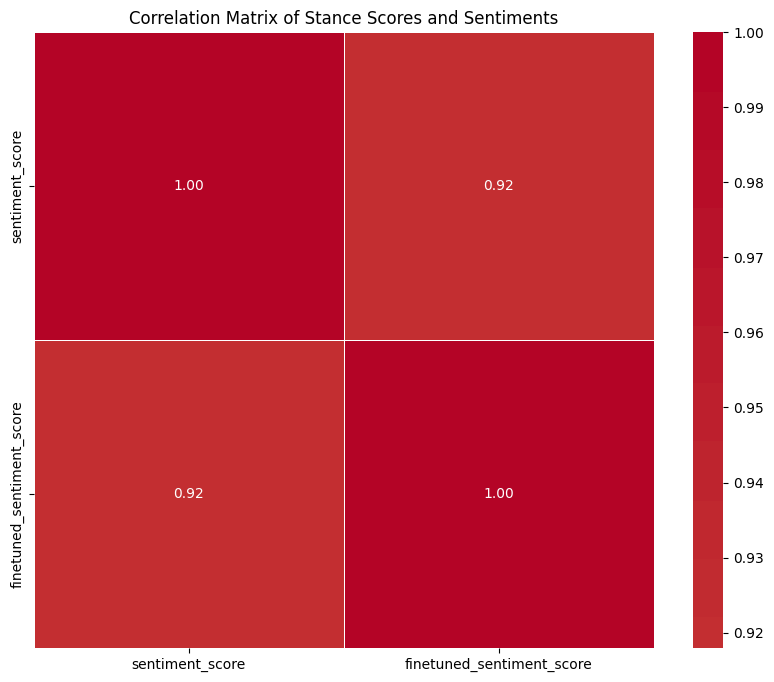

In [50]:
# Calcola la matrice di correlazione
def print_corr_matrix(score_df):
    correlation_matrix = score_df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")
    plt.title('Correlation Matrix of Stance Scores and Sentiments')
    plt.show()

extract_score = lambda x: x['score']

# Converti in DataFrame
df = pd.DataFrame(data)
score_df = pd.DataFrame()
# check the two sentiemnt scores correlation
score_df['sentiment_score'] = df['sentiment'].apply(extract_score)
score_df['finetuned_sentiment_score'] = df['sentiment_score_finetuned'].apply(extract_score)
print_corr_matrix(score_df)


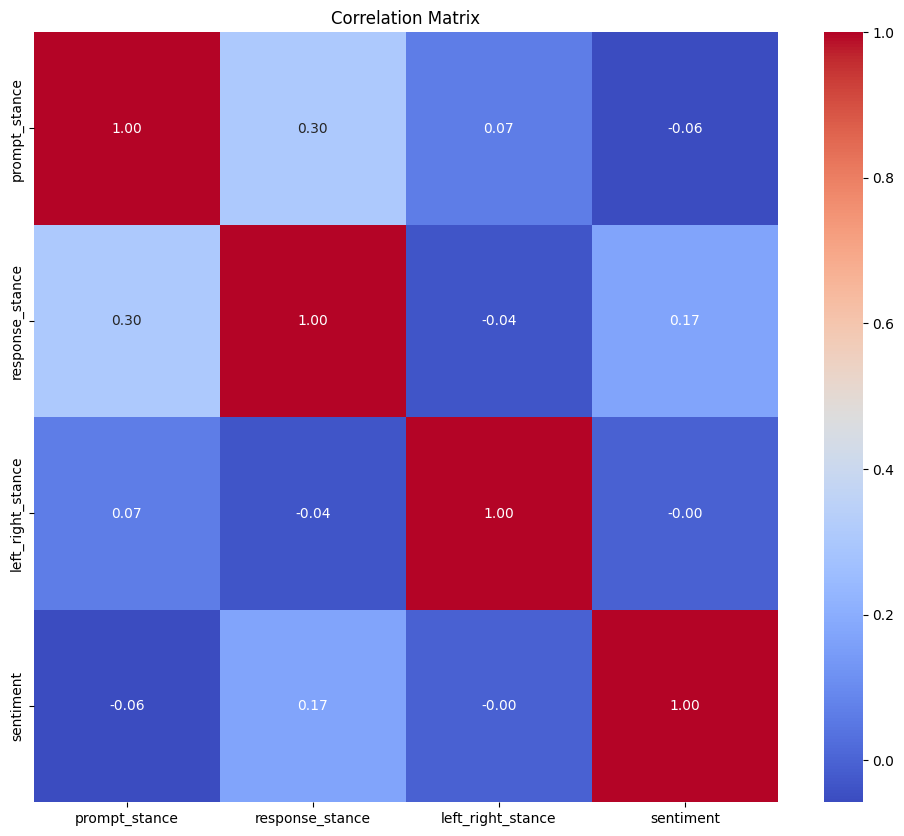

In [51]:
def extract_scores(df):
    def map_label_to_score(row):
        label = row['label']
        score = row['score']
        if label in ['positive', 'about capitalism', 'right wing']:
            return score
        elif label in ['negative', 'about communism', 'left wing']:
            return -score
        else:
            return 1 - score
       
    scores = {}
    labels = ['prompt_stance', 'response_stance', 'left_right_stance', 'sentiment']
    
    for label in labels:
        scores[f'{label}'] = df[label].apply(map_label_to_score)
    
    return pd.DataFrame(scores)

def plot_correlation_matrix(df):
    """ Crea e visualizza la matrice di correlazione """
    corr_matrix = df.corr()
    plt.figure(figsize=(12,10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show()

# Estrai i punteggi e calcola la correlazione
score_df = extract_scores(df)
score_df = score_df.loc[:, (score_df != 0).any(axis=0)]
plot_correlation_matrix(score_df)

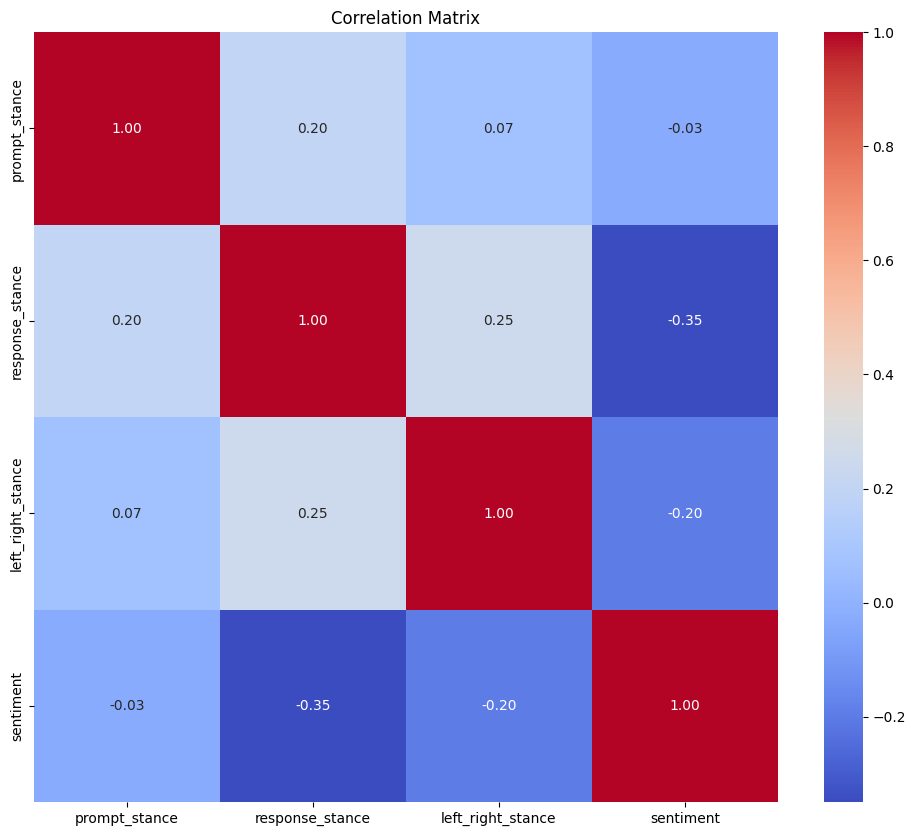

In [52]:
def extract_scores(df):
    def map_label_to_score(row):
        label = row['label']
        score = row['score']
        if label in ['positive', 'about capitalism', 'right wing']:
            return 1
        elif label in ['negative', 'about communism', 'left wing']:
            return -1
        else:
            return 0
       
    scores = {}
    labels = ['prompt_stance', 'response_stance', 'left_right_stance', 'sentiment']
    
    for label in labels:
        scores[f'{label}'] = df[label].apply(map_label_to_score)
    
    return pd.DataFrame(scores)

def plot_correlation_matrix(df):
    """ Crea e visualizza la matrice di correlazione """
    corr_matrix = df.corr()
    plt.figure(figsize=(12,10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show()

# Estrai i punteggi e calcola la correlazione
score_df = extract_scores(df)
score_df = score_df.loc[:, (score_df != 0).any(axis=0)]
plot_correlation_matrix(score_df)

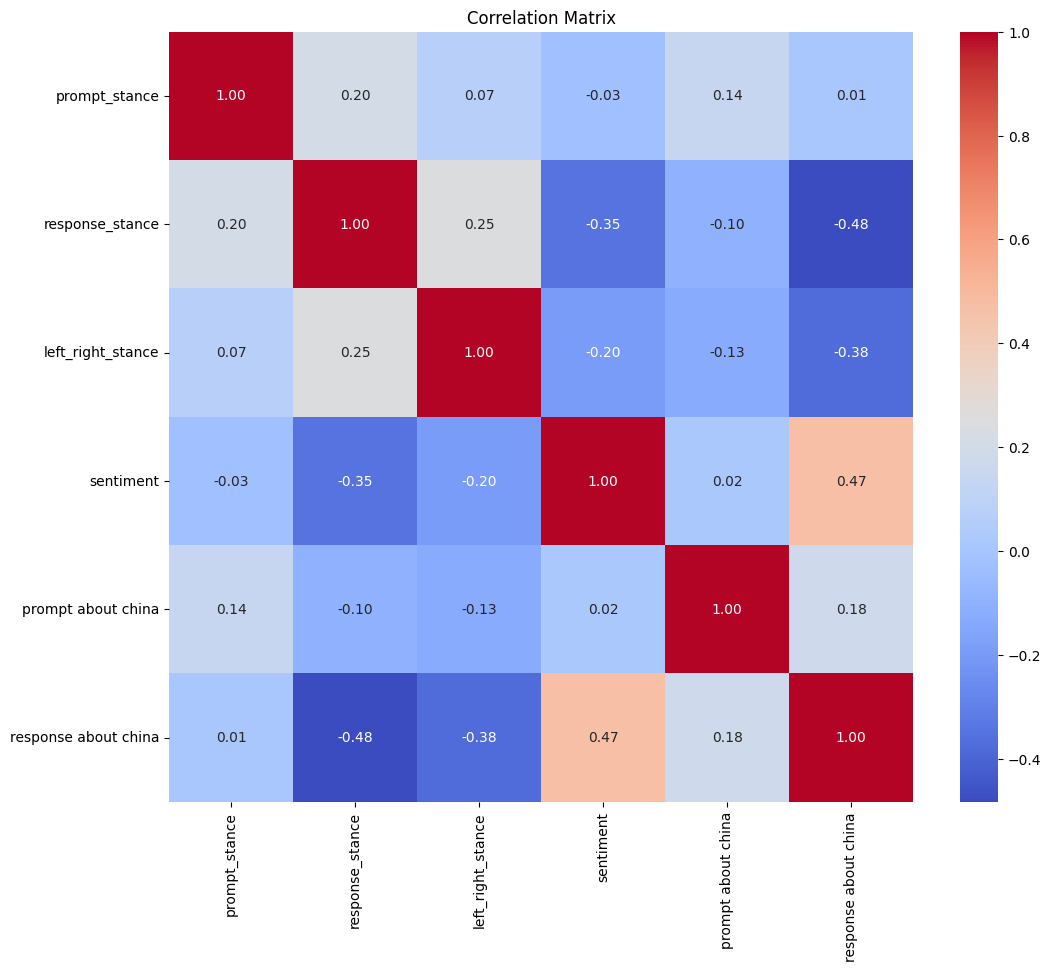

In [53]:
def extract_scores(df):
    def map_label_to_score(row):
        label = row['label']
        score = row['score']
        if label in ['positive', 'about capitalism', 'right wing']:
            return 1
        elif label in ['negative', 'about communism', 'left wing']:
            return -1
        else:
            return 0
       
    scores = {}
    labels = ['prompt_stance', 'response_stance', 'left_right_stance', 'sentiment']
    about_china_labels = ['prompt_about_china', 'response_about_china']

    
    for label in labels:
        scores[f'{label}'] = df[label].apply(map_label_to_score)
    for label in about_china_labels:
        scores[label.replace("_", " ")] = df[label].apply(lambda x: 1 if x else -1)
    
    return pd.DataFrame(scores)

def plot_correlation_matrix(df):
    """ Crea e visualizza la matrice di correlazione """
    corr_matrix = df.corr()
    plt.figure(figsize=(12,10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show()

# Estrai i punteggi e calcola la correlazione
score_df = extract_scores(df)
score_df = score_df.loc[:, (score_df != 0).any(axis=0)]
plot_correlation_matrix(score_df)

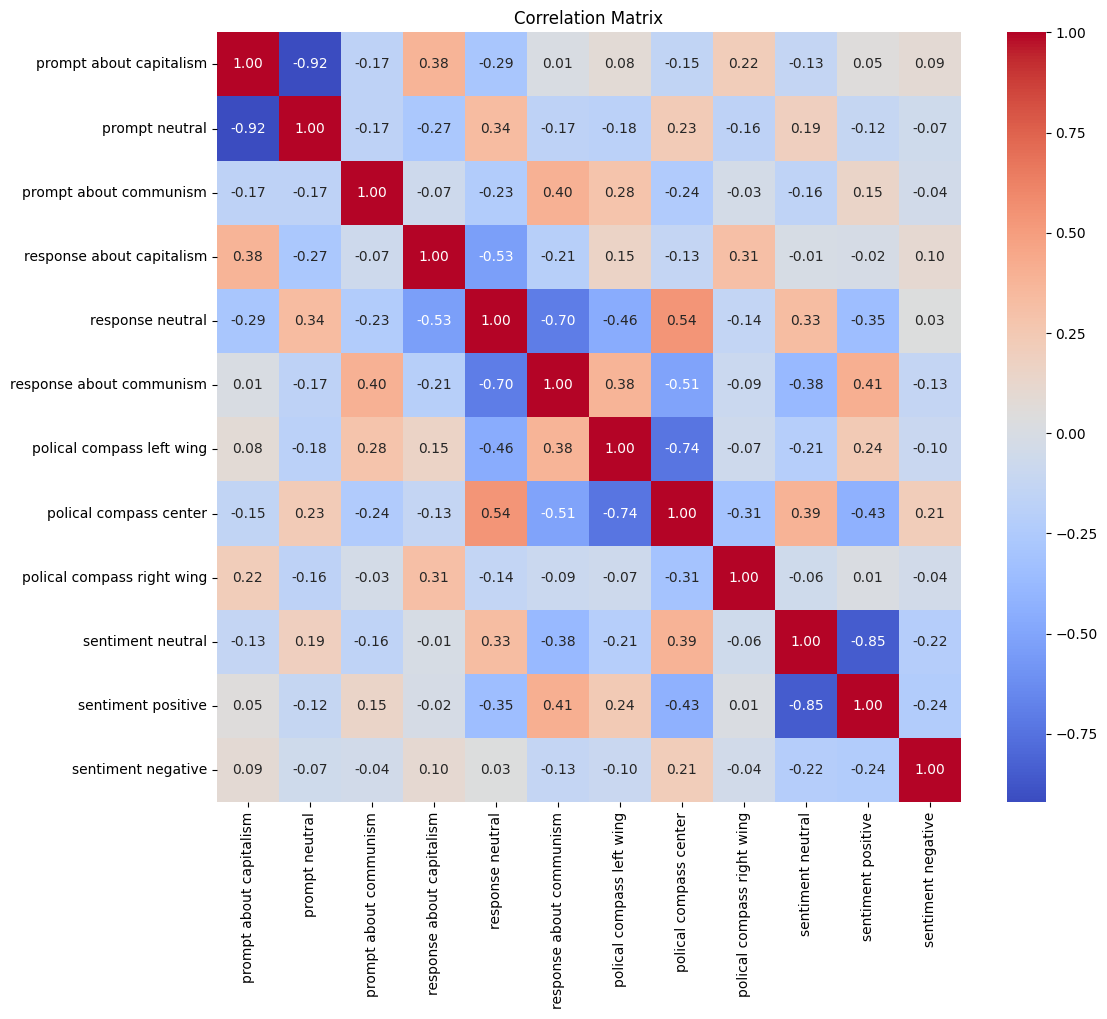

In [54]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

def extract_scores(df):
    """ Estrai gli score dalle colonne rilevanti e crea un nuovo DataFrame con tutte le combinazioni di label """
    scores = {}
    labels = ['prompt_stance', 'response_stance', 'left_right_stance', 'sentiment']
    
    for label in labels:
        for value in ['about capitalism', 'neutral', 'about communism', 'left wing', 'center', 'right wing', 'positive', 'negative']:
            scores[f'{label} {value}'.replace("_stance", "").replace("_", " ").replace("left right", "polical compass")] = df[label].apply(lambda x: x['score'] if x['label'] == value else 0)
    
    return pd.DataFrame(scores)

def plot_correlation_matrix(df):
    """ Crea e visualizza la matrice di correlazione """
    corr_matrix = df.corr()
    plt.figure(figsize=(12,10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show()

# Estrai i punteggi e calcola la correlazione
score_df = extract_scores(df)
score_df = score_df.loc[:, (score_df != 0).any(axis=0)]
plot_correlation_matrix(score_df)

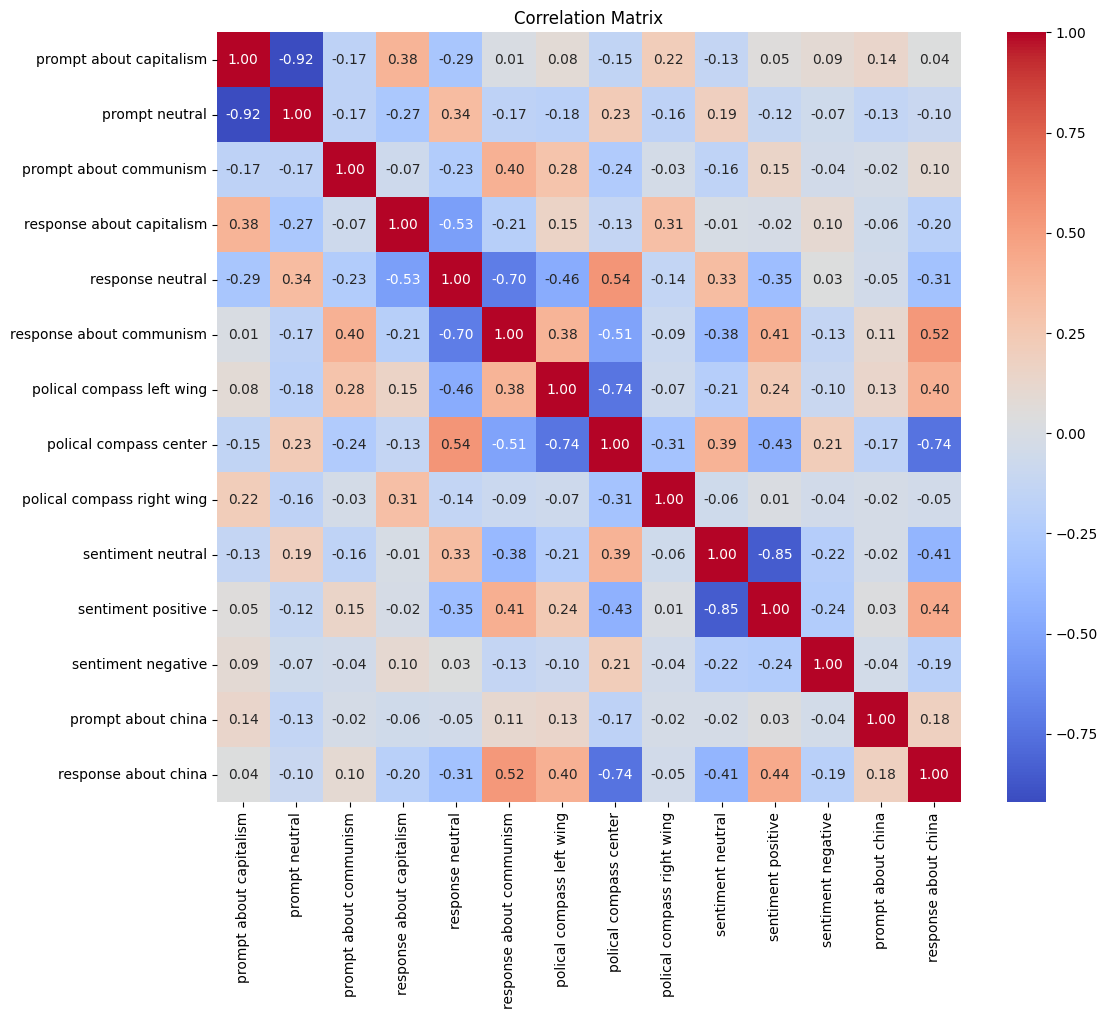

In [55]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

def extract_scores(df):
    """ Estrai gli score dalle colonne rilevanti e crea un nuovo DataFrame con tutte le combinazioni di label """
    scores = {}
    labels = ['prompt_stance', 'response_stance', 'left_right_stance', 'sentiment']
    about_china_labels = ['prompt_about_china', 'response_about_china']
    label_values = ['about capitalism', 'neutral', 'about communism', 'left wing', 'center', 'right wing', 'positive', 'negative']
    
    for label in labels:
        for value in label_values:
            scores[f'{label} {value}'.replace("_stance", "").replace("_", " ").replace("left right", "polical compass")] = df[label].apply(lambda x: x['score'] if x['label'] == value else 0)
    for label in about_china_labels:
        scores[label.replace("_", " ")] = df[label].apply(lambda x: 1 if x else -1)
    
    return pd.DataFrame(scores)

def plot_correlation_matrix(df):
    """ Crea e visualizza la matrice di correlazione """
    corr_matrix = df.corr()
    plt.figure(figsize=(12,10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show()

# Estrai i punteggi e calcola la correlazione
score_df = extract_scores(df)
score_df = score_df.loc[:, (score_df != 0).any(axis=0)]
plot_correlation_matrix(score_df)